# 노드 개수와 무방향그래프를 입력 받아 트리가 최소 높이가 되는 루트의 목록을 리턴하라.

- 예제 1
    - 입력
    ```python
    n = 4, edges = [[1,0],[1,2],[1,3]]
    ```
    - 출력
    ```python
    [1]
    ```

- 예제 2
    - 입력
    ```python
    n = 6, edges = [[0,3],[1,3],[2,3],[4,3],[5,4]]
    ```
    - 출력
    ```python
    [3,4]
    ```

# Solution

1. 최소 높이를 구성하려면 가장 가운데에 있는 값이 루트노드여야한다. 

2. 이 말은 리프노드를 하나씩 제거해 나가면서 남아 있는 값을 찾으면 이 값이 가장 가운데에 있는 값이 될 것이고, 이 값을 루트로 했을 때 최소 높이를 구성할 수 있다는 뜻이다.

3. 문제에 제시된 입력값은 너무 단순하므로 [[1,3],[2,3],[3,4],[3,5],[4,6],[6,10],[5,7],[5,8],[8,9]] 처럼 구성해보자.

4. 여기서 리프노드를 한번씩 각각 제거하면 3,4,5,6,8 이 남을 것이다. 한번 더 실행하면 6,8 이 제거되어 3,4,5 가 남을 것이다.

5. 최종적으로 리프노드를 제거하면 3 만 남는다. 그림으로 살펴보자.


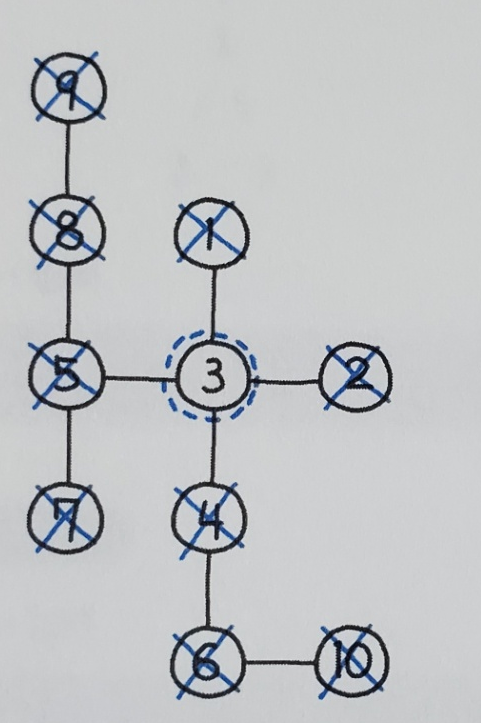


6. 이제 이 과정을 코드로 구현해야 한다. 인접리스트를 구현해야 하므로 defaultdict 를 불러오자.

7. 이 문제에서 그래프는 무방향이므로(Undirected) 트리의 부모와 자식은 양쪽 노드 모두 번갈아 가능하다.
8. 따라서 양쪽 모두 graph 라는 이름의 그래프 딕셔너리 변수에 양방향으로 삽입하여 구성한다.

```python
graph = collections.defaultdict(list)
for i,j in edges:
    graph[i].append(j)
    graph[j].append(i)
```

9. 리프노드를 찾아서 leaves 에 추가한다. 리프노드는 그래프에서 해당 키의 값이 1개뿐인 것을 말한다. 실제로 그래프가 그렇게 구성되어 있는지 한번 출력해보자.

```python
leaves = []
for i in range(n+1):
    if len(graph[i]) == 1:
        leaves.append(i)
```

In [4]:
test_data = [[1,3],[2,3],[3,4],[3,5],[4,6],[6,10],[5,7],[5,8],[8,9]]
import collections
def findMinHeightTrees(n,edges):
    graph = collections.defaultdict(list)
    # 양방향 삽입
    for i,j in edges:
        graph[i].append(j)
        graph[j].append(i)
    leaves = []
    for i in range(n+1):
        if len(graph[i]) == 1:
            leaves.append(i)
    print(graph)
findMinHeightTrees(9,test_data)

defaultdict(<class 'list'>, {1: [3], 3: [1, 2, 4, 5], 2: [3], 4: [3, 6], 5: [3, 7, 8], 6: [4, 10], 10: [6], 7: [5], 8: [5, 9], 9: [8], 0: []})


- 입력값을 기준으로 딕셔너리로 표현한 그래프는 이런 식으로 되고, 이중에서 값이 1개뿐인 1,2,10,7,9 가 첫번쨰 리프노드로 leaves 리스트 변수에 담기게 된다.

- 이제 다음과 같이 루트가 남을 떄까지 반복해서 계속 제거한다.

```python
while n > 2:
    n -= len(leaves)
    new_leaves = []
    for leaf in leaves:
        neighbor = graph[leaf].pop()
        graph[neighbor].remove(leaf)

        if len(graph[neighbor])==1:
            new_leaves.append(neighbor)
    leaves = new_leaves
```

- n은 전체 노드의 개수이므로 여기서 leaves, 즉 리프 노드의 개수만큼 계속 빼나가면서 최종 2개 이하가 남을 떄까지 반복한다. 

- 마지막에 남은 값이 홀수개일 때는 루트가 최종 1개가 되지만, 짝수 개일때는 2개가 될 수 있다. 따라서 while 문은 2개까지는 반복한다.

- 그래프 딕셔너리에서 pop() 으로 제거하고, 연결된 값도 찾아서 제거한다. 즉 무방향 그래프라서 각각 두번씩 만들었으므로 제거 또한 두번씩 진행한다.

- 이제 마찬가지로 값이 1개일때는 리프노드란 뜻이므로 새로운 리프노드를 new_leaves 로 구성하여 교체한다.

In [5]:
# 전체 코드

test_data = [[1,3],[2,3],[3,4],[3,5],[4,6],[6,10],[5,7],[5,8],[8,9]]
import collections
def findMinHeightTrees(n,edges):
    graph = collections.defaultdict(list)
    # 양방향 삽입 그래프 구성
    for i,j in edges:
        graph[i].append(j)
        graph[j].append(i)
    
    # 첫번쨰 리프노드 추가

    leaves = []
    for i in range(n+1):
        if len(graph[i]) == 1:
            leaves.append(i)
    
    # 루트노드만 남을 때 까지 반복제거

    while n > 2:
        n -= len(leaves)
        new_leaves = []
        for leaf in leaves:
            neighbor = graph[leaf].pop()
            graph[neighbor].remove(leaf)

            if len(graph[neighbor])==1:
                new_leaves.append(neighbor)
        leaves = new_leaves
    
    return leaves
findMinHeightTrees(9,test_data)

[4]

# defaultdict 가 어떨 때 사용하는 함수더라?

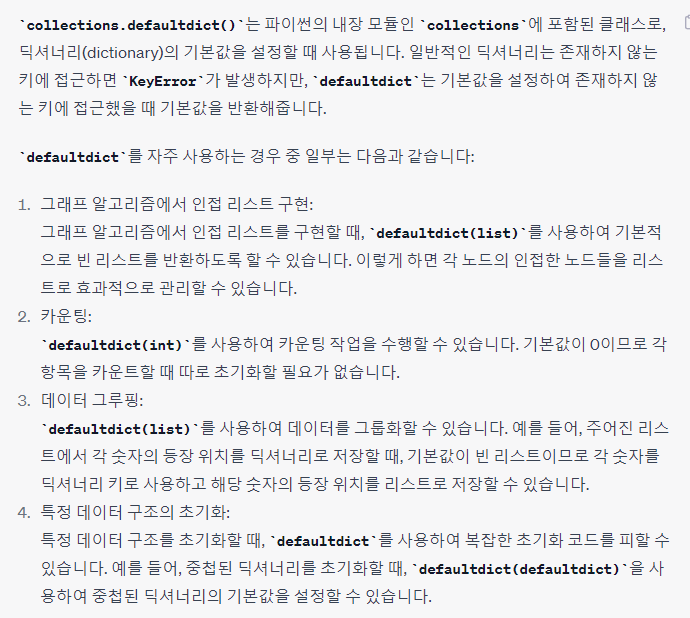